# Florida Data Analysis - Opioid Shipment And Overdosage Related Mortality


## Pre-Post Analysis Of Opioid Shipments In Florida


In [204]:
# importing the required libraries
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [205]:
# loading data for drug prescriptions in Florida and neighbouring states
prescriptions = pd.read_csv(r"05_cleaned_data\prescriptions_fl.csv", low_memory=False)


In [206]:
prescriptions.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Revised_Company_Name', 'Reporter_family', 'dos_str', 'Year', 'Month',
       'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS', 'StateAbbr',
       'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'State', 'Population',
       'county_test'],
      dtyp

In [207]:
prescriptions.head(3)

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,State,Population,county_test
0,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
1,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach
2,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701.0,SUFFOLK,...,palm beach,Florida,12099,FL,FL | PALM BEACH,FL,1209912,FL,1286586.0,Palm Beach


In [208]:
prescriptions.columns


Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Revised_Company_Name', 'Reporter_family', 'dos_str', 'Year', 'Month',
       'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS', 'StateAbbr',
       'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'State', 'Population',
       'county_test'],
      dtyp

In [209]:
# reducing the number of columns in the drug prescriptions dataset by including only the relevant attributes to create a new dataset

prescriptions_reduced = prescriptions[
    [
        "DRUG_CODE",
        "DRUG_NAME",
        "QUANTITY",
        "UNIT",
        "STRENGTH",
        "CALC_BASE_WT_IN_GM",
        "DOSAGE_UNIT",
        "Product_Name",
        "Ingredient_Name",
        "Measure",
        "MME_Conversion_Factor",
        "dos_str",
        "Year",
        "Month",
        "StateFIPS",
        "StateName",
        "CountyFIPS",
        "state_abbrev",
        "FIP_unique",
        "Population",
        "county_test",
    ]
]

In [210]:
prescriptions_reduced.head(5)

,DRUG_CODE,DRUG_NAME,QUANTITY,UNIT,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,Product_Name,Ingredient_Name,Measure,...,dos_str,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9143.0,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007.0,2.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
1,9143.0,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007.0,3.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
2,9143.0,OXYCODONE,6.0,NaN,0.0,5.3790,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
3,9143.0,OXYCODONE,12.0,NaN,0.0,32.2740,1200.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach
4,9193.0,HYDROCODONE,1.0,NaN,0.0,0.6054,100.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2007.0,4.0,12,Florida,12099,FL,1209912,1286586.0,Palm Beach


In [211]:
# creating a copy of reduced dataset of prescriptions and converting some of the attributes to appropriate data type

prescriptions_reduced_copy = prescriptions_reduced.copy()

prescriptions_reduced_copy["Year"] = prescriptions_reduced_copy["Year"].astype("int64")
prescriptions_reduced_copy["DRUG_CODE"] = prescriptions_reduced_copy[
    "DRUG_CODE"
].astype("int64")
prescriptions_reduced_copy["Month"] = prescriptions_reduced_copy["Month"].astype(
    "int64"
)
prescriptions_reduced_copy["Population"] = prescriptions_reduced_copy[
    "Population"
].astype("int64")

prescriptions_reduced_copy.rename(
    columns={
        "DRUG_CODE": "Drug Code",
        "DRUG_NAME": "Drug Name",
        "QUANTITY": "Quantity",
        "UNIT": "Unit",
        "STRENGTH": "Strength",
        "CALC_BASE_WT_IN_GM": "Calc Base Weight (In Gm)",
        "DOSAGE_UNIT": "Dosage Unit",
        "dos_str": "Dosage Strength",
        "StateFIPS": "State FIPS",
        "StateName": "State",
        "CountyFIPS": "County FIPS",
        "state_abbrev": "State Abbreviation",
        "FIP_unique": "FIPS_Unique",
        "county_test": "County",
    },
    inplace=True,
)

In [212]:
prescriptions_reduced_copy.head(3)

,Drug Code,Drug Name,Quantity,Unit,Strength,Calc Base Weight (In Gm),Dosage Unit,Product_Name,Ingredient_Name,Measure,...,Dosage Strength,Year,Month,State FIPS,State,County FIPS,State Abbreviation,FIPS_Unique,Population,County
0,9143,OXYCODONE,3.0,NaN,0.0,21.516,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach
1,9143,OXYCODONE,3.0,NaN,0.0,21.516,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach
2,9143,OXYCODONE,6.0,NaN,0.0,5.379,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach


In [213]:
# creating a dataset that has all the drug prescriptions in the state of Florida

florida_prescriptions = prescriptions_reduced_copy[
    prescriptions_reduced_copy["State"] == "Florida"
]

florida_prescriptions.head()


,Drug Code,Drug Name,Quantity,Unit,Strength,Calc Base Weight (In Gm),Dosage Unit,Product_Name,Ingredient_Name,Measure,...,Dosage Strength,Year,Month,State FIPS,State,County FIPS,State Abbreviation,FIPS_Unique,Population,County
0,9143,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,2,12,Florida,12099,FL,1209912,1286586,Palm Beach
1,9143,OXYCODONE,3.0,NaN,0.0,21.5160,300.0,OXYCODONE HCL 80MG TABS,OXYCODONE HYDROCHLORIDE,TAB,...,80.0,2007,3,12,Florida,12099,FL,1209912,1286586,Palm Beach
2,9143,OXYCODONE,6.0,NaN,0.0,5.3790,600.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,...,10.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
3,9143,OXYCODONE,12.0,NaN,0.0,32.2740,1200.0,OXYCODONE HYDROCHLORIDE USP 30MG TAB,OXYCODONE HYDROCHLORIDE,TAB,...,30.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach
4,9193,HYDROCODONE,1.0,NaN,0.0,0.6054,100.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,...,10.0,2007,4,12,Florida,12099,FL,1209912,1286586,Palm Beach


## Pre-Post Analysis Of Drug Overdose Deaths In Florida


In [214]:
# loading data on deaths in Florida and its neighbouring states
deaths = pd.read_csv(r"05_cleaned_data/deaths_fl.csv")
deaths.head(3)

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State,StateFIPS,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,Population,county_test
0,Autauga,1001.0,2007.0,2007.0,All other non-drug and non-alcohol causes,O9,399.0,AL,1,Autauga,Alabama,1001,AL,AL | AUTAUGA,AL,10011,52405.0,Autauga
1,Autauga,1001.0,2008.0,2008.0,All other non-drug and non-alcohol causes,O9,448.0,AL,1,Autauga,Alabama,1001,AL,AL | AUTAUGA,AL,10011,53277.0,Autauga
2,Autauga,1001.0,2009.0,2009.0,All other non-drug and non-alcohol causes,O9,408.0,AL,1,Autauga,Alabama,1001,AL,AL | AUTAUGA,AL,10011,54135.0,Autauga


In [215]:
deaths.columns


Index(['County', 'County Code', 'Year', 'Year Code',
       'Drug/Alcohol Induced Cause', 'Drug/Alcohol Induced Cause Code',
       'Deaths', 'State', 'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS',
       'StateAbbr', 'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'Population',
       'county_test'],
      dtype='object')

In [216]:
# creating a copy of deaths dataset, to prevent SettingWithCopy warnings. The irrelevant columns are dropped.

deaths_copy = deaths.copy()
deaths_copy.drop(
    [
        "County Code",
        "Year Code",
        "Drug/Alcohol Induced Cause Code",
        "State",
        "CountyName",
        "StateAbbr",
        "STATE_COUNTY",
        "county_test",
    ],
    axis=1,
    inplace=True,
)
deaths_copy.head(3)


,County,Year,Drug/Alcohol Induced Cause,Deaths,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population
0,Autauga,2007.0,All other non-drug and non-alcohol causes,399.0,1,Alabama,1001,AL,10011,52405.0
1,Autauga,2008.0,All other non-drug and non-alcohol causes,448.0,1,Alabama,1001,AL,10011,53277.0
2,Autauga,2009.0,All other non-drug and non-alcohol causes,408.0,1,Alabama,1001,AL,10011,54135.0


In [217]:
# converting some of the columns to more appropriate data type - integer data type
deaths_copy["Year"] = deaths_copy["Year"].astype("int64")
deaths_copy["Deaths"] = deaths_copy["Deaths"].astype("int64")
deaths_copy["Population"] = deaths_copy["Population"].astype("int64")


# renaming some of the columns to appear more conventional
deaths_copy.rename(
    columns={
        "StateFIPS": "State FIPS",
        "CountyFIPS": "County FIPS",
        "StateName": "State",
        "state_abbrev": "State Abbreviation",
        "FIP_unique": "FIPS_Unique",
    },
    inplace=True,
)

deaths_copy.head(3)


,County,Year,Drug/Alcohol Induced Cause,Deaths,State FIPS,State,County FIPS,State Abbreviation,FIPS_Unique,Population
0,Autauga,2007,All other non-drug and non-alcohol causes,399,1,Alabama,1001,AL,10011,52405
1,Autauga,2008,All other non-drug and non-alcohol causes,448,1,Alabama,1001,AL,10011,53277
2,Autauga,2009,All other non-drug and non-alcohol causes,408,1,Alabama,1001,AL,10011,54135


In [218]:
deaths_copy["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Mississippi', 'South Carolina',
       'Tennessee'], dtype=object)

In [219]:
deaths_copy["Drug/Alcohol Induced Cause"].unique()


array(['All other non-drug and non-alcohol causes',
       'Drug poisonings (overdose) Unintentional (X40-X44)',
       'All other alcohol-induced causes',
       'Drug poisonings (overdose) Undetermined (Y10-Y14)',
       'All other drug-induced causes',
       'Drug poisonings (overdose) Suicide (X60-X64)',
       'Alcohol poisonings (overdose) (X45, X65, Y15)'], dtype=object)

In [220]:
# creating the dataset for Florida which has all deaths that are drug related

florida_deaths = deaths_copy[
    (deaths_copy["State"] == "Florida")
    & (
        (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Unintentional (X40-X44)"
        )
        | (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Undetermined (Y10-Y14)"
        )
        | (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Suicide (X60-X64)"
        )
    )
]

In [221]:
florida_deaths.head(5)


,County,Year,Drug/Alcohol Induced Cause,Deaths,State FIPS,State,County FIPS,State Abbreviation,FIPS_Unique,Population
618,Alachua,2007,Drug poisonings (overdose) Unintentional (X40-...,17,12,Florida,12001,FL,1200112,242685
623,Alachua,2009,Drug poisonings (overdose) Unintentional (X40-...,15,12,Florida,12001,FL,1200112,246657
626,Alachua,2010,Drug poisonings (overdose) Unintentional (X40-...,15,12,Florida,12001,FL,1200112,247614
629,Alachua,2011,Drug poisonings (overdose) Unintentional (X40-...,14,12,Florida,12001,FL,1200112,249834
632,Alachua,2012,Drug poisonings (overdose) Unintentional (X40-...,14,12,Florida,12001,FL,1200112,251520


In [222]:
florida_deaths_copy = florida_deaths.copy()


In [223]:
# calculating the drug related death rates in Florida per 100000 people

florida_deaths_copy["Overdose_Per_100K"] = (
    florida_deaths_copy["Deaths"] / florida_deaths_copy["Population"]
) * 100_000

florida_deaths_copy.head(3)


,County,Year,Drug/Alcohol Induced Cause,Deaths,State FIPS,State,County FIPS,State Abbreviation,FIPS_Unique,Population,Overdose_Per_100K
618,Alachua,2007,Drug poisonings (overdose) Unintentional (X40-...,17,12,Florida,12001,FL,1200112,242685,7.004965
623,Alachua,2009,Drug poisonings (overdose) Unintentional (X40-...,15,12,Florida,12001,FL,1200112,246657,6.081319
626,Alachua,2010,Drug poisonings (overdose) Unintentional (X40-...,15,12,Florida,12001,FL,1200112,247614,6.057816


In [224]:
# calculating and displaying year and county wise results for drug related deaths in Florida

florida_result = (
    florida_deaths_copy.groupby(["Year", "County"])["Overdose_Per_100K"]
    .sum()
    .reset_index()
)
florida_result.head(5)


,Year,County,Overdose_Per_100K
0,2007,Alachua,7.004965
1,2007,Bay,18.143881
2,2007,Brevard,19.269286
3,2007,Broward,15.225255
4,2007,Citrus,12.058961


In [225]:
# calculating and displaying yearwise results for drug related deaths in Florida

florida_results_yearwise = florida_deaths_copy.groupby("Year")[
    "Overdose_Per_100K"
].mean()
florida_results_yearwise

Year
2007    10.589778
2008    11.389320
2009    10.090938
2010    11.976183
2011    11.423950
2012    10.435346
2013     9.046919
Name: Overdose_Per_100K, dtype: float64

In [226]:
florida_result_copy = florida_result.copy()

# create a scale for number of years before and after 2010 (target year)
def scale_years(year):
    if year == 2007:
        return -3
    if year == 2008:
        return -2
    if year == 2009:
        return -1
    if year == 2010:
        return 0
    if year == 2011:
        return 1
    if year == 2012:
        return 2
    if year == 2013:
        return 3


florida_result_copy["Year Relative To Policy"] = florida_result_copy["Year"].apply(
    lambda x: scale_years(x)
)

# double check no nulls in "year relative to policy"

assert florida_result_copy["Year Relative To Policy"].isnull().sum() == 0

# doing this in case the float == int comparison causes issues

In [246]:
# split into before 2010 and after 2010

florida_mortality_before_policy_change = florida_result_copy[
    florida_result_copy["Year"] < 2010
]
florida_mortality_after_policy_change = florida_result_copy[
    florida_result_copy["Year"] > 2010
]

from sklearn.linear_model import LinearRegression

regressor_before = LinearRegression()
regressor_after = LinearRegression()


x_before = np.array(
    florida_mortality_before_policy_change["Year Relative To Policy"]
).reshape(-1, 1)
y_before = np.array(
    florida_mortality_before_policy_change["Overdose_Per_100K"]
).reshape(-1, 1)

x_after = np.array(
    florida_mortality_after_policy_change["Year Relative To Policy"]
).reshape(-1, 1)
y_after = np.array(florida_mortality_after_policy_change["Overdose_Per_100K"]).reshape(
    -1, 1
)


regressor_before.fit(x_before, y_before)
regressor_after.fit(x_after, y_after)


y_pred_before = regressor_before.predict(x_before)
y_pred_after = regressor_after.predict(x_after)

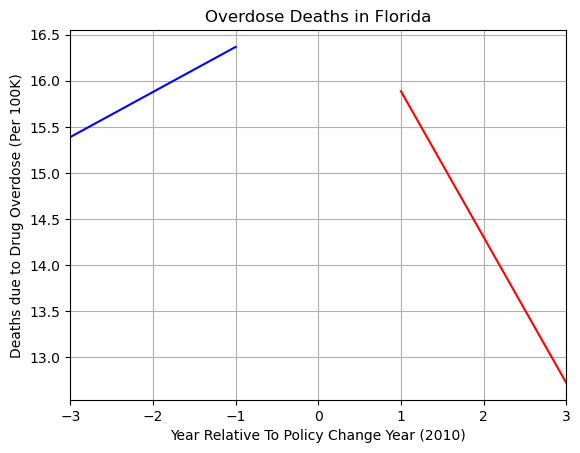

In [255]:
import matplotlib.pyplot as plt

plt.xlim(-3, 3)
# plt.ylim(0, 500)

plt.xlabel("Year Relative To Policy Change Year (2010)")
plt.ylabel("Deaths due to Drug Overdose (Per 100K)")
plt.title("Overdose Deaths in Florida")

plt.plot(x_before, y_pred_before, color="blue")
plt.plot(x_after, y_pred_after, color="red")

plt.grid()
# plot avg value in each year

## Difference-In-Difference Analysis Of Drug Overdose Deaths In Florida


In [229]:
# creating a new dataset, that contains drug related deaths in other neighboring states of Florida - Alabama, Georgia, Mississippi, South Carolin and Tennessee

other_states_deaths = deaths_copy[
    (deaths_copy["State"] != "Florida")
    & (
        (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Unintentional (X40-X44)"
        )
        | (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Undetermined (Y10-Y14)"
        )
        | (
            deaths_copy["Drug/Alcohol Induced Cause"]
            == "Drug poisonings (overdose) Suicide (X60-X64)"
        )
    )
]


In [230]:
other_states_deaths_copy = other_states_deaths.copy()

other_states_deaths_copy["Overdose_Per_100K"] = (
    other_states_deaths_copy["Deaths"] / other_states_deaths_copy["Population"]
) * 100_000


In [231]:
# calculating and displaying results for drug related deaths - year, state and county wise

other_states_result = (
    other_states_deaths_copy.groupby(["Year", "State", "County"])["Overdose_Per_100K"]
    .sum()
    .reset_index()
)
other_states_result.head()


,Year,State,County,Overdose_Per_100K
0,2007,Alabama,Baldwin,13.920791
1,2007,Alabama,Calhoun,9.465541
2,2007,Alabama,Houston,10.232587
3,2007,Alabama,Jefferson,10.226463
4,2007,Alabama,Lauderdale,17.561768


In [232]:
# calculating yearwise drug related deaths results for Alabama
alabama_results_yearwise = (
    other_states_deaths_copy[other_states_deaths_copy["State"] == "Alabama"]
    .groupby("Year")["Overdose_Per_100K"]
    .mean()
)
alabama_results_yearwise


Year
2007    13.368704
2008    16.361755
2009    15.272194
2010    14.556800
2011    14.767924
2012    14.834840
2013    18.018408
Name: Overdose_Per_100K, dtype: float64

In [233]:
# calculating yearwise drug related deaths results for Georgia
georgia_results_yearwise = (
    other_states_deaths_copy[other_states_deaths_copy["State"] == "Georgia"]
    .groupby("Year")["Overdose_Per_100K"]
    .mean()
)
georgia_results_yearwise


Year
2007    11.960843
2008    10.328943
2009    11.745507
2010    13.869420
2011    12.381299
2012    11.653082
2013    11.902365
Name: Overdose_Per_100K, dtype: float64

In [234]:
# calculating yearwise drug related deaths results for Mississippi
mississippi_results_yearwise = (
    other_states_deaths_copy[other_states_deaths_copy["State"] == "Mississippi"]
    .groupby("Year")["Overdose_Per_100K"]
    .mean()
)
mississippi_results_yearwise


Year
2007    21.903231
2008    17.037801
2009    20.989875
2010    18.498209
2011    16.426466
2012    15.167236
2013    19.345719
Name: Overdose_Per_100K, dtype: float64

In [235]:
# calculating yearwise drug related deaths results for South Carolina
south_carolina_results_yearwise = (
    other_states_deaths_copy[other_states_deaths_copy["State"] == "South Carolina"]
    .groupby("Year")["Overdose_Per_100K"]
    .mean()
)
south_carolina_results_yearwise


Year
2007    12.447756
2008    12.431124
2009    13.862295
2010    14.429518
2011    12.253051
2012    12.683164
2013    13.080714
Name: Overdose_Per_100K, dtype: float64

In [236]:
# calculating yearwise drug related deaths results for Tennessee
tennessee_results_yearwise = (
    other_states_deaths_copy[other_states_deaths_copy["State"] == "Tennessee"]
    .groupby("Year")["Overdose_Per_100K"]
    .mean()
)
tennessee_results_yearwise


Year
2007    16.285685
2008    14.739367
2009    14.611214
2010    17.048880
2011    18.678175
2012    16.506248
2013    20.844220
Name: Overdose_Per_100K, dtype: float64

In [237]:
# calculating and displaying yearwise results for drug related deaths in neighboring states around Florida (combined)

other_states_results_combined_yearwise = other_states_deaths_copy.groupby("Year")[
    "Overdose_Per_100K"
].mean()
other_states_results_combined_yearwise

Year
2007    14.318559
2008    13.344370
2009    13.970196
2010    15.250104
2011    14.856076
2012    13.861571
2013    16.016143
Name: Overdose_Per_100K, dtype: float64

In [238]:
# these yearwise results have been calculated while doing the pre-post analysis of drug overdose deaths in Florida
florida_results_yearwise


Year
2007    10.589778
2008    11.389320
2009    10.090938
2010    11.976183
2011    11.423950
2012    10.435346
2013     9.046919
Name: Overdose_Per_100K, dtype: float64

In [244]:
other_states_result_copy = other_states_result.copy()

other_states_result_copy["Year Relative To Policy"] = other_states_result_copy["Year"].apply(
    lambda x: scale_years(x)
)

# double check no nulls in "year relative to policy"

assert other_states_result_copy["Year Relative To Policy"].isnull().sum() == 0

# doing this in case the float == int comparison causes issues

In [250]:
other_states_before = other_states_result_copy[other_states_result_copy["Year"] < 2010]
other_states_after = other_states_result_copy[other_states_result_copy["Year"] > 2010]

regressor_other_states_before = LinearRegression() 
regressor_other_states_after = LinearRegression()


x_other_before = np.array(other_states_before["Year Relative To Policy"]).reshape(-1, 1)
y_other_before = np.array(other_states_before["Overdose_Per_100K"]).reshape(-1, 1)

x_other_after = np.array(other_states_after["Year Relative To Policy"]).reshape(-1, 1)
y_other_after = np.array(other_states_after["Overdose_Per_100K"]).reshape(-1, 1)


regressor_other_states_before.fit(x_other_before, y_other_before) 
regressor_other_states_after.fit(x_other_after, y_other_after) 


y_pred_other_before = regressor_other_states_before.predict(x_other_before)
y_pred_other_after = regressor_other_states_after.predict(x_other_after)




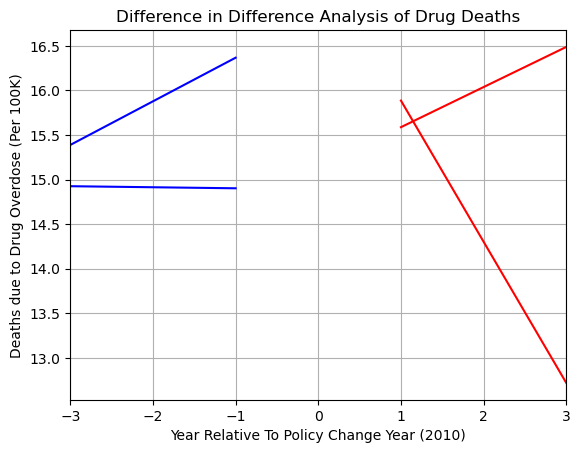

In [257]:
plt.xlim(-3, 3)
# plt.ylim(0, 500)

plt.xlabel("Year Relative To Policy Change Year (2010)")
plt.ylabel("Deaths due to Drug Overdose (Per 100K)")
plt.title("Difference in Difference Analysis of Drug Deaths")

plt.plot(x_other_before, y_pred_other_before ,color='blue')
plt.plot(x_other_after, y_pred_other_after,color='red')

plt.plot(x_before,y_pred_before,color="blue")
plt.plot(x_after,y_pred_after,color="red")

plt.grid()